In [1]:
%matplotlib inline

# conda install -c conda-forge tabula-py

from tabula import read_pdf
import pandas as pd

This notebook contains code to read the tables from [National Center for Health Statistics](https://www.cdc.gov/nchs/products/life_tables.htm), specifically [United States Life Tables, 2015. NVSR Volume 67, Number 7. 64pp. (PHS) 2019-1120.](https://www.cdc.gov/nchs/data/nvsr/nvsr67/nvsr67_07-508.pdf)

The following function reads a page from the PDF file and converts it to a Pandas DataFrame.

In [2]:
def read_page(pages):
    pandas_options = dict(thousands=',')
    df = read_pdf('data/nvsr67_07-508.pdf', pages=pages, pandas_options=pandas_options)
    df.columns = df.loc[2]
    df.drop([0,1,2], inplace=True)
    return df

In [3]:
df1 = read_page(9)

In [4]:
df2 = read_page(10)
df2.head()

2,Age (years),qx,lx,dx,Lx,Tx,ex
3,61–62 . . . . . . . . . . . . . . . . . . . ....,0.009652,"87,763",847,"87,339","1,968,648",22.4
4,62–63 . . . . . . . . . . . . . . . . . . . ....,0.010353,"86,915",900,"86,466","1,881,309",21.6
5,63–64 . . . . . . . . . . . . . . . . . . . ....,0.011081,"86,016",953,"85,539","1,794,843",20.9
6,64–65 . . . . . . . . . . . . . . . . . . . ....,0.011838,"85,062","1,007","84,559","1,709,304",20.1
7,65–66 . . . . . . . . . . . . . . . . . . . ....,0.012634,"84,055","1,062","83,524","1,624,745",19.3


In [5]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

2,Age (years),qx,lx,dx,Lx,Tx,ex
0,0–1 . . . . . . . . . . . . . . . . . . . . ....,0.005894,"100,000",589,"99,483","7,872,239",78.7
1,1–2 . . . . . . . . . . . . . . . . . . . . ....,0.000403,"99,411",40,"99,391","7,772,756",78.2
2,2–3 . . . . . . . . . . . . . . . . . . . . ....,0.000252,"99,371",25,"99,358","7,673,366",77.2
3,3–4 . . . . . . . . . . . . . . . . . . . . ....,0.000193,"99,345",19,"99,336","7,574,008",76.2
4,4–5 . . . . . . . . . . . . . . . . . . . . ....,0.000145,"99,326",14,"99,319","7,474,672",75.3


In [6]:
df.tail()

2,Age (years),qx,lx,dx,Lx,Tx,ex
96,96–97 . . . . . . . . . . . . . . . . . . . ....,0.247715,"7,175","1,777","6,286","21,040",2.9
97,97–98 . . . . . . . . . . . . . . . . . . . ....,0.268255,"5,398","1,448","4,674","14,753",2.7
98,98–99 . . . . . . . . . . . . . . . . . . . ....,0.289322,"3,950","1,143","3,378","10,079",2.6
99,99–100 . . . . . . . . . . . . . . . . . . . ...,0.310753,"2,807",872,"2,371","6,701",2.4
100,100 and over . . . . . . . . . . . . . . . . ...,1.000000,"1,935","1,935","4,330","4,330",2.2


In [7]:
df.to_csv('data/nvsr67_07-508.csv', index=False)

In [8]:
df = pd.read_csv('data/nvsr67_07-508.csv', thousands=',')
df.index += 1
df.head()

,Age (years),qx,lx,dx,Lx,Tx,ex
1,0–1 . . . . . . . . . . . . . . . . . . . . ....,0.005894,100000,589,99483,7872239,78.7
2,1–2 . . . . . . . . . . . . . . . . . . . . ....,0.000403,99411,40,99391,7772756,78.2
3,2–3 . . . . . . . . . . . . . . . . . . . . ....,0.000252,99371,25,99358,7673366,77.2
4,3–4 . . . . . . . . . . . . . . . . . . . . ....,0.000193,99345,19,99336,7574008,76.2
5,4–5 . . . . . . . . . . . . . . . . . . . . ....,0.000145,99326,14,99319,7474672,75.3


In [9]:
df['qx'].describe()

count    101.000000
mean       0.045402
std        0.118265
min        0.000091
25%        0.001028
50%        0.004481
75%        0.029614
max        1.000000
Name: qx, dtype: float64

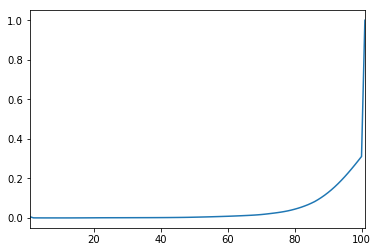

In [10]:
df['qx'].plot()

In [11]:
df['lx'].describe()

count       101.000000
mean      78406.910891
std       29424.301281
min        1935.000000
25%       69559.000000
50%       94158.000000
75%       98503.000000
max      100000.000000
Name: lx, dtype: float64

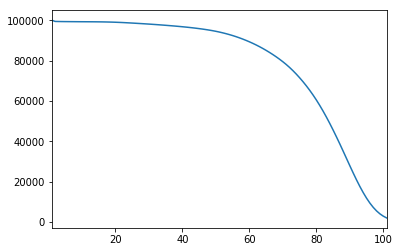

In [12]:
df['lx'].plot()

In [13]:
df['dx'].describe()

count     101.000000
mean      990.089109
std      1155.804785
min         9.000000
25%       101.000000
50%       420.000000
75%      1704.000000
max      3632.000000
Name: dx, dtype: float64

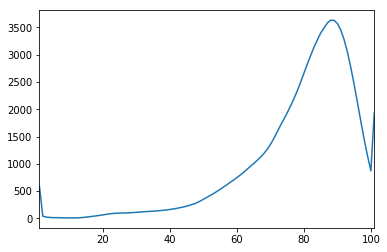

In [14]:
df['dx'].plot()

In [15]:
df['Lx'].describe()

count      101.000000
mean     77942.990099
std      29802.903640
min       2371.000000
25%      68529.000000
50%      93965.000000
75%      98454.000000
max      99483.000000
Name: Lx, dtype: float64

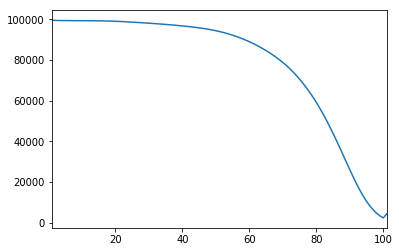

In [16]:
df['Lx'].plot()

In [17]:
df['Tx'].describe()

count    1.010000e+02
mean     3.241379e+06
std      2.509621e+06
min      4.330000e+03
25%      8.484750e+05
50%      2.973738e+06
75%      5.393758e+06
max      7.872239e+06
Name: Tx, dtype: float64

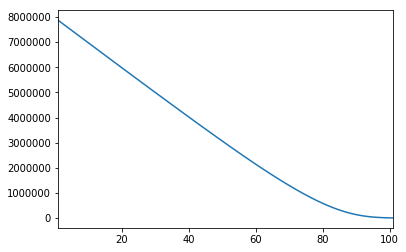

In [18]:
df['Tx'].plot()

In [19]:
df['ex'].describe()

count    101.000000
mean      34.423762
std       23.948011
min        2.200000
25%       12.200000
50%       31.600000
75%       54.800000
max       78.700000
Name: ex, dtype: float64

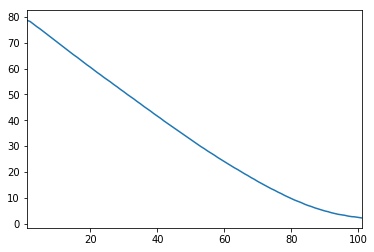

In [20]:
df['ex'].plot()